# Homework 2: Exploratory data analysis and visualization

UIC CS 418, Spring 2020

_According to the **Academic Integrity Policy** of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

This homework is an individual assignment for all graduate students. Undergraduate students are allowed to work in pairs and submit one homework assignment per pair. There will be no extra credit given to undergraduate students who choose to work alone. The pairs of students who choose to work together and submit one homework assignment together still need to abide by the Academic Integrity Policy and not share or receive help from others (except each other).

There are three parts in this homework. The first one is a practice introduction to `matplotlib` (5%). The second is a guided exploration of a bikeshare dataset (45%). The third one is a self-guided exploration of a dataset on social media and internet attitudes (50%). You can also earn extra credit of 20%.


## Due Date

This assignment is due at 11:59pm Thursday, February 20th. 


### What to Submit

You need to complete all code and answer all questions denoted by **Q#** (each one is under a bike image) in this notebook. When you are done, you should export **hw2.ipynb** with your answers as a PDF file, upload the PDF file to *Homework 2 - Written Part* on Gradescope, tagging each question. You need to upload a completed Jupyter notebook (hw2.ipynb file) to *Homework 2 - code* on Gradescope. If one of these two parts (written and code) is missing, you will lose 50%. For undergraduate students who work in a team of two, only one student needs to submit the homework and just tag the other student on Gradescope.

#### Autograding

We will not use autograding for this homework assignment.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Practice: `matplotlib` (5%)

[`matplotlib`][mpl] is the most widely used plotting library available for Python. It comes with a good amount of out-of-the-box functionality and is highly customizable. Most other plotting libraries in Python provide simpler ways to generate complicated `matplotlib` plots, including `seaborn`, so it's worth learning a bit about `matplotlib` now.

Notice how all of our notebooks have lines that look like:

	%matplotlib inline
	import matplotlib.pyplot as plt
	
The `%matplotlib inline` magic command tells `matplotlib` to render the plots
directly onto the notebook (by default it will open a new window with the plot).

Then, the `import` line lets us call `matplotlib` functions using `plt.<func>`

Here's a graph of `cos(x)` from 0 to 2 * pi.

[mpl]: http://matplotlib.org/

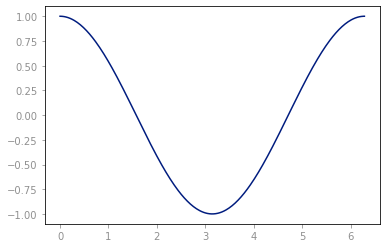

In [166]:
# Set up (x, y) pairs from 0 to 2*pi
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.cos(xs)

# plt.plot takes in x-values and y-values and plots them as a line
plt.plot(xs, ys)

`matplotlib` also conveniently has the ability to plot multiple things on the same plot. Just call `plt.plot` multiple times in the same cell:

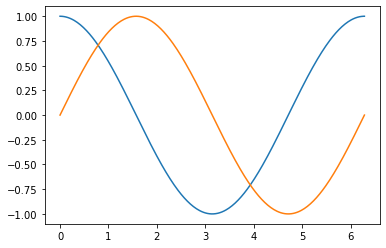

In [3]:
plt.plot(xs, ys)
plt.plot(xs, np.sin(xs))

That plot looks pretty nice but isn't publication-ready. Luckily, `matplotlib` has a wide array of plot customizations.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q0 (5%):

Skim through the first part of the tutorial at
https://www.labri.fr/perso/nrougier/teaching/matplotlib to create the plot below. There is a lot of extra information there which we suggest
you read on your own time. For now, just look for what you need to make the plot.

Specifically, you'll have to change the x and y limits, add a title, and add a legend.

![](q1.png)

([<matplotlib.axis.YTick at 0x256c78d38c8>,
 <a list of 5 Text yticklabel objects>)

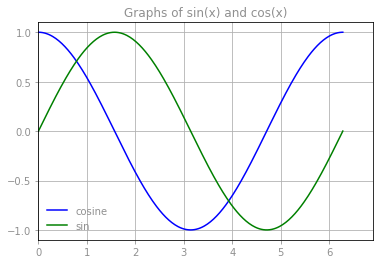

In [167]:
# Here's the starting code from last time. Edit / Add code to create the plot above.
plt.title('Graphs of sin(x) and cos(x)')
plt.xlim(xs.min()*1.1, xs.max()*1.1)
plt.ylim(ys.min()*1.1, ys.max()*1.1)
plt.yticks([-1, -0.5, 0, 0.5, +1])
plt.plot(xs, ys, color="blue", label="cosine")
plt.plot(xs, np.sin(xs), color="green", label="sin")
plt.legend(loc='lower left', frameon=False)
plt.grid()
plt.yticks(np.arange(-1.0, 1.4, 0.5))

# Part 1: Guided EDA of bikeshare trips (40%)

You will be performing some basic EDA (exploratory data analysis) on
bikeshare data in Washington D.C. 

The variables in this data frame are defined as:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not
- weekday : day of the week (Sunday to Saturday)
- workingday : if day is neither weekend nor holiday
- weathersit :
    - 1: Clear or partly cloudy
    - 2: Mist + clouds
    - 3: Light Snow or Rain
    - 4: Heavy Rain or Snow
- temp : Normalized temperature in Celsius (divided by 41)
- atemp: Normalized feeling temperature in Celsius (divided by 50)
- hum: Normalized percent humidity (divided by 100)
- windspeed: Normalized wind speed (divided by 67)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including casual and registered

In [22]:
bike_trips = pd.read_csv('bikeshare.csv')

# Here we'll do some pandas datetime parsing so that the dteday column
# contains datetime objects.
bike_trips['dteday'] += ':' + bike_trips['hr'].astype(str)
bike_trips['dteday'] = pd.to_datetime(bike_trips['dteday'], format="%Y-%m-%d:%H")
bike_trips = bike_trips.drop(['yr', 'mnth', 'hr'], axis=1)

bike_trips.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01 01:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01 02:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01 03:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01 04:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.1 (8%):

What is the data granularity?
What time range is represented here? Write code in the cell below to perform your exploration.

In [23]:
grps=bike_trips.groupby('dteday')
grps.sum()

,instant,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01 01:00:00,2,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01 02:00:00,3,1,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01 03:00:00,4,1,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01 04:00:00,5,1,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,17375,1,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31 20:00:00,17376,1,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31 21:00:00,17377,1,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


Data granularity tries to show how fine/coarse is each datum is. This data is taken every hour from 1-1-2011 to 12-31-2012. You can find these dates by grouping the data by dteday, this orgainizes the data by dates and times in order. 

## Using `pandas` to plot

`pandas` provides useful methods on dataframes. For simple plots, we prefer to
just use those methods instead of the `matplotlib` methods since we're often
working with dataframes anyway. The syntax is:

    dataframe.plot.<plotfunc>

Where the `<plotfunc>` is one of the functions listed under _Plotting_ here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

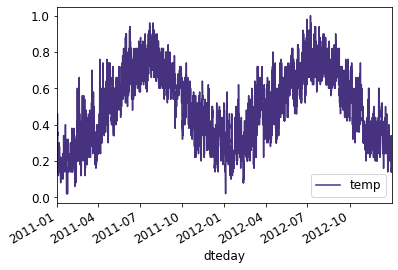

In [24]:
# This plot shows the temperature at each data point

bike_trips.plot.line(x='dteday', y='temp')

## `seaborn`

Now, we'll learn how to use the [`seaborn`][sns] Python library. `seaborn`
is built on top of `matplotlib` and provides many helpful functions
for statistical plotting that `matplotlib` and `pandas` don't have.

Generally speaking, we'll use `seaborn` for more complex statistical plots,
`pandas` for simple plots (eg. line / scatter plots), and
`matplotlib` for plot customization.

Nearly all `seaborn` functions are designed to operate on `pandas`
dataframes. Most of these functions assume that the dataframe is in
a specific format called *long-form*, where each column of the dataframe
is a particular feature and each row of the dataframe a single datapoint.

For example, this dataframe is long-form:

```
   country year avgtemp
 1  Sweden 1994       6
 2 Denmark 1994       6
 3  Norway 1994       3
 4  Sweden 1995       5
 5 Denmark 1995       8
 6  Norway 1995      11
 7  Sweden 1996       7
 8 Denmark 1996       8
 9  Norway 1996       7
```

But this dataframe of the same data is not:

```
   country avgtemp.1994 avgtemp.1995 avgtemp.1996
 1  Sweden            6            5            7
 2 Denmark            6            8            8
 3  Norway            3           11            7
```

Note that the `bike_trips` dataframe is long-form.

For more about long-form data, see https://stanford.edu/~ejdemyr/r-tutorials/wide-and-long.
For now, just remember that we typically prefer long-form data and it makes plotting using
`seaborn` easy as well.

[sns]: http://seaborn.pydata.org/index.html

We can create the same plot as the `dataframe.plot` above using the following `seaborn` function: `sns.lineplot`. Notice that instead of calling the plot function on dataframe object, here we pass it as a parameter to the function:

In [ ]:
# You can create a plot similar to the one above using the following seaborn syntax
# Note that the seaborn plot is a bit different and requires some customizations (more on this later)
sns.lineplot(x="dteday", y="temp", data=bike_trips)

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.2 (8%):

Use seaborn's `barplot` function to make a bar chart showing the average
number of registered riders on each day of the week over the 
entire `bike_trips` dataset.

Here's a link to the seaborn API: http://seaborn.pydata.org/api.html

See if you can figure it out by reading the docs. 

What trends do you notice? What do you suppose causes these trends?

Notice that `barplot` draws error bars for each category. It uses bootstrapping to make those.

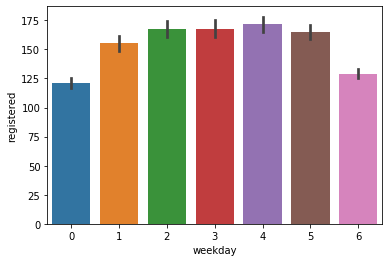

In [12]:
sns.barplot(x='weekday', y='registered', data = bike_trips)

from this bar plot, you can see that the average number of registered bike share users are much higher during the weekdays compared to the weekends. This trend is most likely caused by people riding bikes share bikes to work because there are a lot of people work during the weekdays and not the weekends. 

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.3 (8%):

Now for a fancier plot that `seaborn` makes really easy to produce.

Use the `distplot` function to plot a histogram of all the total rider counts in the `bike_trips` dataset. Notice that `seaborn` will fit a curve to the histogram of the data. Fancy!

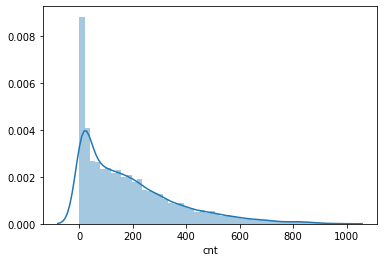

In [8]:
sns.distplot(bike_trips['cnt']);

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.4 (8%):

Use `seaborn` to make side-by-side boxplots of the number of casual riders (just
checked out a bike for that day) and registered riders (have a bikeshare membership). The `boxplot` function will plot all the columns of the dataframe you pass in.

Once you make the plot, you'll notice that there are many outliers that make the plot hard to see. To mitigate this, change the y-scale to be logarithmic.

That's a plot customization so you'll use `matplotlib`. The `boxplot` function returns a `matplotlib` Axes object which represents a single plot and has a `set_yscale` function.

The result should look like:

![](q5.png)

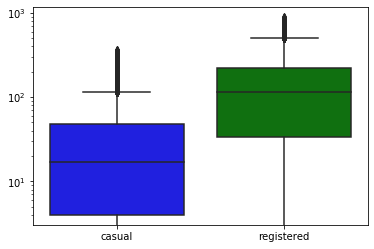

In [4]:
colorsw = ["#0000FF", "#008000"]
sns.set_palette("dark")
g = sns.boxplot(data=bike_trips, order=['casual', 'registered'], palette = colorsw)
plt.yscale('log')

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.5 (8%):

Let's take a closer look at the number of registered vs. casual riders.

Use the `lmplot` function to make a scatterplot. Put the number of casual
riders on the x-axis and the number of registered riders on the y-axis.
Each point should correspond to a single row in your `bike_trips` dataframe. Notice that `seaborn` automatically fits a line of best
fit to the plot. Does that line seem to be relevant?

You should note that `lmplot` allows you to pass in `fit_line=False` to
avoid plotting lines of best fit when you feel they are unnecessary 
or misleading.

There seem to be two main groups in the scatterplot. Let's
see if we can separate them out. Use `lmplot` to make the scatterplot again. This time, use the `hue` parameter
to color points for weekday trips differently from weekend trips. You should
get something that looks like:

![](q1-5.png)


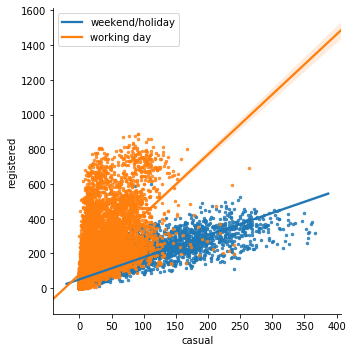

In [53]:
# In your plot, you'll notice that your points are larger than ours. That's
# fine. If you'd like them to be smaller, you can add scatter_kws={'s': 6}
# to your lmplot call. That tells the underlying matplotlib scatter function
# to change the size of the points.

g = sns.lmplot(x = 'casual', y = 'registered', hue = 'workingday', hue_order = None, data = bike_trips,
           legend = False, legend_out = True, scatter_kws={'s': 6})

plt.legend(loc='upper left', labels=['weekend/holiday', 'working day'])
plt.show(g)
# Note that the legend for workingday isn't super helpful. 0 in this case
# means "not a working day" and 1 means "working day". Try fixing the legend
# to be more descriptive.

## Want to learn more?

We recommend checking out the `seaborn` tutorials on your own time. http://seaborn.pydata.org/tutorial.html

The `matplotlib` tutorial we linked in Question 1 is also a great refresher on common `matplotlib` functions: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

Here's a great blog post about the differences between Python's visualization libraries:
https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/


# Part 2: Self-directed EDA of social media and internet attitudes (55%)

The last part is intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them.  The goal here is for you to thoroughly explore a dataset on attitudes towards the internet and whether it's good for society. 

_Question 2.0_ is asking you to look at a given visualization and reverse engineer the code that created it. _Question 2.1_ is about _data exploration visualization_ while the other questions are about _data presentation visualization_. Report your three most significant findings (_Q2.2, Q2.3, and Q2.4_). Each finding should have a _visualization headline_  which highlights the main takeaway in 5-15 words, an informative visualization that supports your finding and a _visualization description_, 100-150 words per finding explaining your assumptions and what you have found. For example, the visualization headline could be "_Majority of Facebook, Instagram and Snapchat users visit these social networks daily_" with the following bar plot visualization:  

<img src="q2-1.png">


The survey data that you will analyze was collected by Pew Research. In order to access it, you need to create an account and download it from [here](https://www.pewresearch.org/internet/dataset/core-trends-survey/) (click on "Download Dataset" in upper right corner). The file you will work with is `January 8-February 7, 2019 - Core Trends Survey - CSV.csv`. The file that contains information about the meaning of each feature is `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx`.


Be sure to consider transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit (as covered in Chapter 6 of PTDS) to reveal the relationship that you are wanting to learn more about.  Also be sure to make plots that are appropriate for the variable types.  For completeness, be explicit about any assumptions you make in your analysis.  An exemplary plot will have:

* A title
* Labelled and appropriately scaled axes
* A legend, if applicable
* A carefully selected color scheme
* A main point, accentuated through design choices


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.0 (5%): Reverse Engineer

Your first step is to load the data from `January 8-February 7, 2019 - Core Trends Survey - CSV.csv`, and understand what is stored in it. Read the  the survey questionnaire in `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx` to understand the meaning of each feature. Your assignment is to replicate the bar plot visualization shown above. Notice the labels on x and y axes as well as the legend of the plot to determine the information needed to construct the plot.

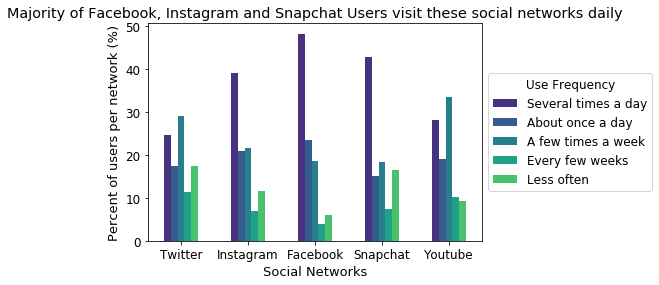

In [9]:
#melt
#wide_to_long

data = pd.read_csv('January 8-February 7, 2019 - Core Trends Survey - CSV.csv')
data1 = data
data2 = data1
data1['Twitter'] = data['web1a']
data1['Instagram'] = data['web1b']
data1['Facebook'] = data['web1c']
data1['Snapchat'] = data['web1d']
data1['Youtube'] =  data['web1e']
data1.drop(['web1a', 'web1b','web1c','web1d','web1e'], axis =1)
gp = pd.DataFrame({'ID' : data1['respid'],
    'Twitter': data1['Twitter'],
    'FrequncyT': data1['sns2a'],
    'Instagram': data1['Instagram'],
    'FrequncyI': data1['sns2b'],
    'Facebook': data1['Facebook'],
    'FrequncyF': data1['sns2c'],
    'Snapchat': data1['Snapchat'],
    'FrequncyS': data1['sns2d'],
    'Youtube': data1['Youtube'],
    'FrequncyY': data1['sns2e'],
                  })

gp2=gp

gp2
gpS = pd.DataFrame(gp2['FrequncyS'])
gpS['FrequncyS'].replace(' ',np.nan, inplace=True)
gpS['FrequncyS'].replace(8,np.nan, inplace=True)
gpS.dropna(subset=['FrequncyS'],inplace=True)
gpS['FrequncyS'].replace(9,np.nan, inplace=True)
gpS.dropna(subset=['FrequncyS'],inplace=True)
gpS['FrequncyS']=pd.to_numeric(gpS['FrequncyS'], downcast='signed')
gpS
snapchat = gpS['FrequncyS'].value_counts(normalize = True).mul(100).rename_axis('type')
snapchat# data for snapchat

gpT = pd.DataFrame(gp2['FrequncyT'])
gpT['FrequncyT'].replace(' ',np.nan, inplace=True)
gpT['FrequncyT'].replace(8,np.nan, inplace=True)
gpT['FrequncyT']=pd.to_numeric(gpT['FrequncyT'], downcast='signed')
gpT['FrequncyT'].replace(9,np.nan, inplace=True)
gpT.dropna(subset=['FrequncyT'],inplace=True)
gpT['FrequncyT']=pd.to_numeric(gpT['FrequncyT'], downcast='signed')
twitter = gpT['FrequncyT'].value_counts(normalize = True).mul(100).rename_axis('type')
twitter# data for twitter

gpI = pd.DataFrame(gp2['FrequncyI'])
gpI['FrequncyI'].replace(' ',np.nan, inplace=True)
gpI['FrequncyI'].replace(8,np.nan, inplace=True)
gpI['FrequncyI']=pd.to_numeric(gpI['FrequncyI'], downcast='signed')
gpI['FrequncyI'].replace(9,np.nan, inplace=True)
gpI.dropna(subset=['FrequncyI'],inplace=True)
gpI['FrequncyI']=pd.to_numeric(gpI['FrequncyI'], downcast='signed')
instagram = gpI['FrequncyI'].value_counts(normalize = True).mul(100).rename_axis('type')
instagram# data for instagram

gpF = pd.DataFrame(gp2['FrequncyF'])
gpF['FrequncyF'].replace(' ',np.nan, inplace=True)
gpF['FrequncyF']=pd.to_numeric(gpF['FrequncyF'], downcast='signed')
gpF['FrequncyF'].replace(8,np.nan, inplace=True)
gpF['FrequncyF']=pd.to_numeric(gpF['FrequncyF'], downcast='signed')
gpF['FrequncyF'].replace(9,np.nan, inplace=True)
gpF.dropna(subset=['FrequncyF'],inplace=True)
gpF['FrequncyF']=pd.to_numeric(gpF['FrequncyF'], downcast='signed')
facebook = gpF['FrequncyF'].value_counts(normalize = True).mul(100).rename_axis('type')
facebook# data for facebook

gpY = pd.DataFrame(gp2['FrequncyY'])
gpY['FrequncyY'].replace(' ',np.nan, inplace=True)
gpY['FrequncyY']=pd.to_numeric(gpY['FrequncyY'], downcast='signed')
gpY['FrequncyY'].replace(8,np.nan, inplace=True)
gpY['FrequncyY']=pd.to_numeric(gpY['FrequncyY'], downcast='signed')
gpY['FrequncyY'].replace(9,np.nan, inplace=True)
gpY.dropna(subset=['FrequncyY'],inplace=True)
gpY['FrequncyY']=pd.to_numeric(gpY['FrequncyY'], downcast='signed')
youtube = pd.DataFrame(gpY['FrequncyY'].value_counts(normalize = True).mul(100).rename_axis('type'))
youtube1 =  pd.DataFrame(gpY['FrequncyY'].value_counts(normalize = True)).mul(100)
youtube# data for youtube

snapchat =pd.DataFrame(snapchat)
youtube =pd.DataFrame(youtube)
twitter=pd.DataFrame(twitter)
instagram=pd.DataFrame(instagram)
facebook=pd.DataFrame(facebook)

twitter = twitter.sort_values(by='type',ascending = True)
instagram = instagram.sort_values(by='type',ascending = True)
facebook = facebook.sort_values(by='type',ascending = True)
snapchat = snapchat.sort_values(by='type',ascending = True)
youtube = youtube.sort_values(by='type',ascending = True)

val1 =[]
val2 =[]
val3 =[]
val4 =[]
val5 =[]

#youtube['FrequncyY'].values[0]

val1.append(twitter['FrequncyT'].values[0])
val1.append(instagram['FrequncyI'].values[0])
val1.append(facebook['FrequncyF'].values[0])
val1.append(snapchat['FrequncyS'].values[0])
val1.append(youtube['FrequncyY'].values[0])

val2.append(twitter['FrequncyT'].values[1])
val2.append(instagram['FrequncyI'].values[1])
val2.append(facebook['FrequncyF'].values[1])
val2.append(snapchat['FrequncyS'].values[1])
val2.append(youtube['FrequncyY'].values[1])

val3.append(twitter['FrequncyT'].values[2])
val3.append(instagram['FrequncyI'].values[2])
val3.append(facebook['FrequncyF'].values[2])
val3.append(snapchat['FrequncyS'].values[2])
val3.append(youtube['FrequncyY'].values[2])

val4.append(twitter['FrequncyT'].values[3])
val4.append(instagram['FrequncyI'].values[3])
val4.append(facebook['FrequncyF'].values[3])
val4.append(snapchat['FrequncyS'].values[3])
val4.append(youtube['FrequncyY'].values[3])

val5.append(twitter['FrequncyT'].values[4])
val5.append(instagram['FrequncyI'].values[4])
val5.append(facebook['FrequncyF'].values[4])
val5.append(snapchat['FrequncyS'].values[4])
val5.append(youtube['FrequncyY'].values[4])

index =['Twitter', 'Instagram', 'Facebook', 'Snapchat', 'Youtube']
df = pd.DataFrame({
    'Several times a day': val1,
    'About once a day': val2,
    'A few times a week': val3,
    'Every few weeks': val4,
    'Less often': val5}, index = index)
ax = df.plot.bar(rot=0)
plt.title("Majority of Facebook, Instagram and Snapchat Users visit these social networks daily",color = 'black')
plt.xlabel("Social Networks",fontsize = 13)
plt.ylabel("Percent of users per network (%)",fontsize = 13)
plt.legend(loc ='center left',bbox_to_anchor = (1.0,0.5),title ='Use Frequency')
sns.set_palette("viridis")
plt.show()


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.1 (5%): Initial exploration

Run descriptive statistics on the data by considering the EDA key data properties we covered in class. Write a 100-150 word description of your findings. Based on these statistics or other ideas you have, form hypotheses that guide your EDA and visualizations for the last three questions. You need to show at least one visualization but you are welcome to show more.

In [229]:
# Run descriptive statistics on the data and develop ideas on what to explore
#mean meadion mode
#data = pd.read_csv('January 8-February 7, 2019 - Core Trends Survey - CSV.csv')
qq = pd.DataFrame({'booksRead': data['books1'],
})
print("\n----------- Calculate Mean -----------\n")
print(qq.mean())
 
print("\n----------- Calculate Median -----------\n")
print(qq.median())
 
print("\n----------- Calculate Mode -----------\n")
print(qq.mode())


----------- Calculate Mean -----------

booksRead    14.518642
dtype: float64

----------- Calculate Median -----------

booksRead    5.0
dtype: float64

----------- Calculate Mode -----------

   booksRead
0          0


Text(0, 0.5, 'The amount of people reading')

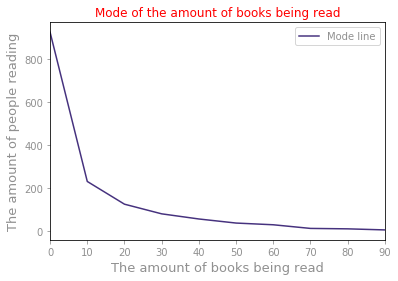

In [230]:
# Create one or more visualizations
count = pd.DataFrame(qq['booksRead'].value_counts(bins = 10).rename_axis('Range'))
x =[0,10,20,30,40,50,60,70,80,90]
y = count['booksRead'].tolist()
df1= pd.DataFrame({'Mode line': y}, index = x)
lines =df1.plot.line()
plt.title("Mode of the amount of books being read",color = 'red')
plt.xlabel("The amount of books being read",fontsize = 13)
plt.ylabel("The amount of people reading",fontsize = 13)


The data we explored were the amount of book being read and the types of books being bought wheter they were digital or hard cover. We learned that about 28% of the given popultaion do not read any books in a year. We also learned that many of the surved population read up 0 to 10 books. We noticed a logrithimitc trend downwards in less people were reading more books. We also noticed that in the amount of people reading more people prefer paper books compared to digital books.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.2 (15%): Graph of Age vs. Internet Use

This is a graph showing the average internet usage throughout the ages. The average is between 1 and 0, 1 meaning yes they use the internet often and 0 meaning they do not use the internet often. You can see that the average steadily decreases and then increases randomly. This increase towards the right side of the graph is most likely caused by a small sample size in that age group, so any response would greatly impact the graph. 

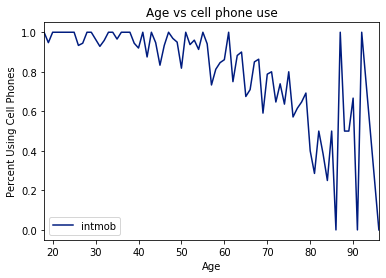

1    1284
2     214
9       2
8       2
Name: intmob, dtype: int64

In [85]:
# your Q2.2 visualization code should be included here 
# make sure to execute it, so we can see your plot in the submitted pdf
# Filter out people who didn't answer for cell use
intmobanswered = data1[(data1['intmob'] == 1) | (data1['intmob'] == 2)]

# Filter out people who didn't answer for age
intmobanswered = intmobanswered[intmobanswered['age'] < 98]
datawewant = intmobanswered[['age', 'intmob']]
#datawewant.intmob = datawewant.intmob.replace(2, 0)
datawewant.intmob.replace(to_replace={2:0, 1:1}, inplace=True)
forgraphing = datawewant.groupby('age').mean()

#axes = forgraphing.plot()
axes = forgraphing.plot()
axes.set_ylabel("Percent Using Cell Phones")
axes.set_xlabel("Age")
axes.set_title("Age vs cell phone use")
plt.show()
data1['intmob'].value_counts()


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.3 (15%): What kind of platform are people reading on?

This graph shows what kind of platform people have read a book on in the last 12 months. These platforms include the classic printed books, audiobooks and e-books. If they have read on that platform within the last year, then they would simply put yes, if not then no. 

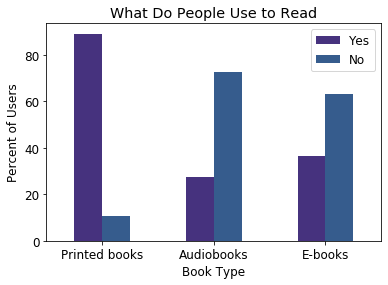

In [20]:
# your Q2.3 visualization code should be included here 
# make sure to execute it, so we can see your plot in the submitted pdf

#melt
#wide_to_long

data = pd.read_csv('January 8-February 7, 2019 - Core Trends Survey - CSV.csv')
data1 = data
data2 = data1
data1['Printed books'] = data['books2a']
data1['Audiobooks'] = data['books2b']
data1['E-books'] = data['books2c']
data1.drop(['books2a', 'books2b','books2c'], axis =1)
gp = pd.DataFrame({'ID' : data1['respid'],
    'Printed books': data1['Printed books'],
    'FrequncyP': data1['books2a'],
    'Audiobooks': data1['Audiobooks'],
    'FrequncyA': data1['books2b'],
    'E-books': data1['E-books'],
    'FrequncyE': data1['books2c'],
                  })

gp2=gp

gp2
gpS = pd.DataFrame(gp2['FrequncyP'])
gpS['FrequncyP'].replace(' ',np.nan, inplace=True)
gpS['FrequncyP'].replace(8,np.nan, inplace=True)
gpS.dropna(subset=['FrequncyP'],inplace=True)
gpS['FrequncyP'].replace(9,np.nan, inplace=True)
gpS.dropna(subset=['FrequncyP'],inplace=True)
gpS['FrequncyP']=pd.to_numeric(gpS['FrequncyP'], downcast='signed')
gpS
printed_books = gpS['FrequncyP'].value_counts(normalize = True).mul(100).rename_axis('type')
printed_books# data for snapchat

gpT = pd.DataFrame(gp2['FrequncyA'])
gpT['FrequncyA'].replace(' ',np.nan, inplace=True)
gpT['FrequncyA'].replace(8,np.nan, inplace=True)
gpT['FrequncyA']=pd.to_numeric(gpT['FrequncyA'], downcast='signed')
gpT['FrequncyA'].replace(9,np.nan, inplace=True)
gpT.dropna(subset=['FrequncyA'],inplace=True)
gpT['FrequncyA']=pd.to_numeric(gpT['FrequncyA'], downcast='signed')
audiobooks = gpT['FrequncyA'].value_counts(normalize = True).mul(100).rename_axis('type')
audiobooks# data for twitter

gpI = pd.DataFrame(gp2['FrequncyE'])
gpI['FrequncyE'].replace(' ',np.nan, inplace=True)
gpI['FrequncyE'].replace(8,np.nan, inplace=True)
gpI['FrequncyE']=pd.to_numeric(gpI['FrequncyE'], downcast='signed')
gpI['FrequncyE'].replace(9,np.nan, inplace=True)
gpI.dropna(subset=['FrequncyE'],inplace=True)
gpI['FrequncyE']=pd.to_numeric(gpI['FrequncyE'], downcast='signed')
e_books = gpI['FrequncyE'].value_counts(normalize = True).mul(100).rename_axis('type')
e_books# data for instagram


printed_books =pd.DataFrame(printed_books)
audiobooks=pd.DataFrame(audiobooks)
e_books=pd.DataFrame(e_books)



audiobooks = audiobooks.sort_values(by='type',ascending = True)
e_books = e_books.sort_values(by='type',ascending = True)
printed_books = printed_books.sort_values(by='type',ascending = True)

val1 =[]
val2 =[]


#youtube['FrequncyY'].values[0]

val1.append(printed_books['FrequncyP'].values[0])
val1.append(audiobooks['FrequncyA'].values[0])
val1.append(e_books['FrequncyE'].values[0])


val2.append(printed_books['FrequncyP'].values[1])
val2.append(audiobooks['FrequncyA'].values[1])
val2.append(e_books['FrequncyE'].values[1])



index =['Printed books', 'Audiobooks', 'E-books']
df = pd.DataFrame({
    'Yes': val1,
    'No': val2,
    }, index = index)
ax = df.plot.bar(rot=0)
ax.set_ylabel("Percent of Users")
ax.set_xlabel("Book Type")
ax.set_title("What Do People Use to Read")
sns.set_palette("viridis")
plt.show()
#facebook['type']
#viridis


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.4 (15%): How many books are people reading nowadays?

This graph shows how many books people are reading with in a 12 month span.

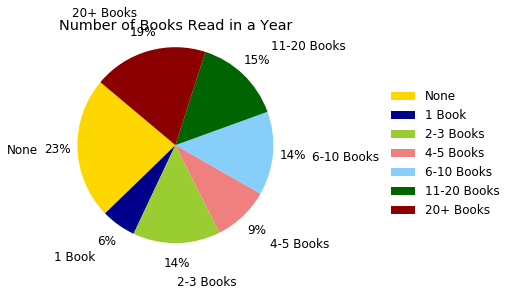

In [19]:
# your Q2.4 visualization code should be included here 
# make sure to execute it, so we can see your plot in the submitted pdf
#datawewant = data1[['books1']]
#datawewant = datawewant.sort_values( by = ['books1'], ascending = True)
#datawewant
col_1 = data1['books1'].value_counts()[0]
col_2 = data1['books1'].value_counts()[1]
col_3 = data1['books1'].value_counts()[2] + data1['books1'].value_counts()[3]
col_4 = data1['books1'].value_counts()[4] + data1['books1'].value_counts()[5]
col_5 = (data1['books1'].value_counts()[6] + data1['books1'].value_counts()[7] + data1['books1'].value_counts()[8]
         + data1['books1'].value_counts()[9] + data1['books1'].value_counts()[10])
col_6 = (data1['books1'].value_counts()[11] + data1['books1'].value_counts()[12] + data1['books1'].value_counts()[13]
         + data1['books1'].value_counts()[14] + data1['books1'].value_counts()[15] + data1['books1'].value_counts()[16]
         + data1['books1'].value_counts()[17] + data1['books1'].value_counts()[18] + data1['books1'].value_counts()[20])
col_7 = 1502 - col_1 - col_2 - col_3 - col_4 - col_5 - col_6


fig, ax = plt.subplots()

plt.rcParams['font.size']=12
labels = ['None', '1 Book','2-3 Books', '4-5 Books', '6-10 Books', '11-20 Books', '20+ Books']
sizes = [col_1, col_2, col_3, col_4, col_5, col_6, col_7]
colors = ['gold', 'darkblue', 'yellowgreen', 'lightcoral', 'lightskyblue', 'darkgreen', 'darkred']
ax.pie(sizes, labels=labels, autopct='%1.0f%%', 
       shadow=False, colors = colors, startangle=140,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Number of Books Read in a Year")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

# Extra Credit (20%)

The best 10 visualizations and insights from Questions 2.2 to 2.4 will get an extra 20% credit (at most one visualization can be considered per submission). There is nothing you need to do for the extra credit except to do your best in the last three questions. We will showcase the best visualizations in class! 

This was the last part of Homework 2. Now you need to submit your work following the instructions in the beginning of the notebook and you are done!